In [201]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [202]:
origin_data = pd.read_csv("sonar_csv.csv")

In [203]:
origin_data.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [204]:
X = origin_data.drop('Class',axis=1)
X.shape

(208, 60)

In [217]:
# 创建PCA对象，指定降维后的维度
pca = PCA(n_components=20)
pca.fit(X)
# 拟合数据并进行降维
X_pca = pca.fit_transform(X)

# 获取主成分和解释方差比
components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.31971149, 0.2038306 , 0.0855582 , 0.06459322, 0.05164156,
       0.04451402, 0.04207696, 0.02632652, 0.02230037, 0.01921817,
       0.01565309, 0.01359272, 0.01170142, 0.00956801, 0.00873325,
       0.00766495, 0.0071944 , 0.00565595, 0.00527314, 0.0048812 ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


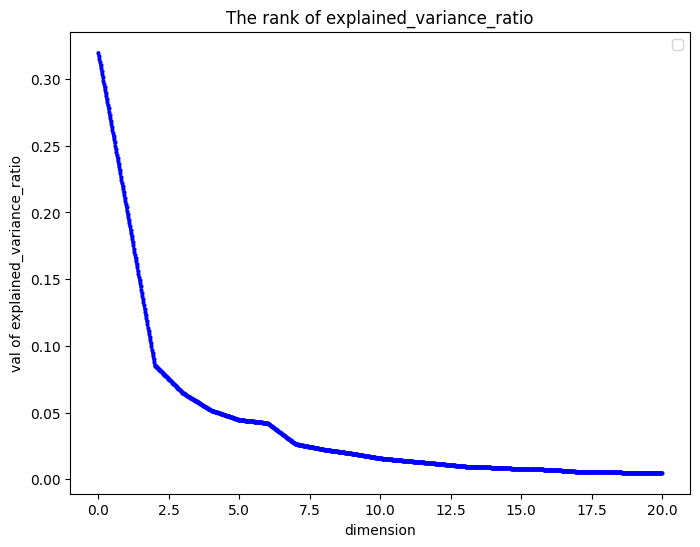

In [222]:
# 生成更多的数据点
x = np.linspace(0, 20, num=1000)  # 生成1000个数据点

# 使用插值法平滑曲线
smoothed_costs1 = np.interp(x, range(20), np.squeeze(explained_variance_ratio))

plt.figure(figsize=(8, 6))
plt.title('The rank of explained_variance_ratio')
plt.xlabel('Dimension')
plt.ylabel('val of explained_variance_ratio')

# 绘制平滑的曲线，设置线条宽度和样式
plt.plot(x, smoothed_costs1, 'b-o', linewidth=2, markersize=2)
#plt.plot( explained_variance_ratio.T, 'b-o', linewidth=2, markersize=2)


# 添加图例
plt.legend()

plt.show()

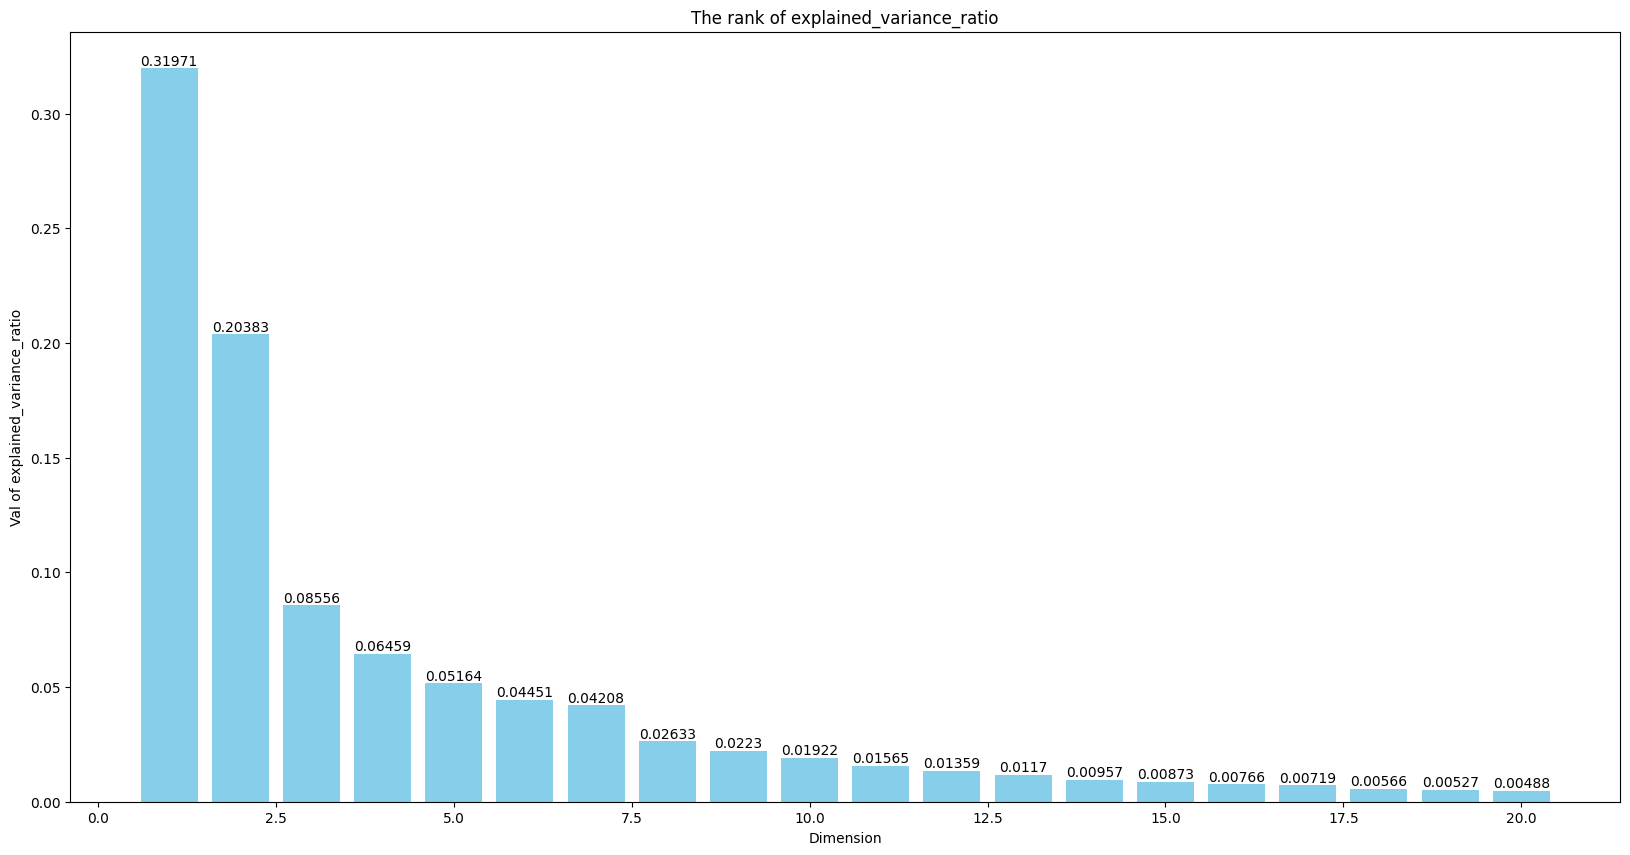

In [232]:
values = explained_variance_ratio.T
categories=range(1,21)
# 创建柱状图
plt.figure(figsize=(20, 10))
plt.bar(categories, values, color='skyblue')
bars = plt.bar(categories, values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 5), ha='center', va='bottom')

# 添加标题和标签
plt.title('The rank of explained_variance_ratio')
plt.xlabel('Dimension')
plt.ylabel('Val of explained_variance_ratio')

# 显示柱状图
plt.show()


In [ ]:
# 创建PCA对象，指定降维后的维度
pca = PCA(n_components=3)
pca.fit(X)
# 拟合数据并进行降维
X_pca = pca.fit_transform(X)

# 获取主成分和解释方差比
components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

In [146]:
X_pca.shape

(208, 3)

In [147]:
x = X_pca
y = origin_data.Class
y_d=np.where(y=='Rock',1,0) #将数据标签bool化，Rock为1，Mine为0
train_set_x,test_set_x,train_set_y,test_set_y=train_test_split(x,y_d,test_size=0.2,random_state=42) #运train_test_split将数据划分为8：2的训练：测试集

In [162]:
train_set_x.shape,train_set_y.shape,test_set_x.shape,test_set_y.shape,x.shape,y_d.shape

((166, 3), (166,), (42, 3), (42,), (208, 3), (208,))

In [223]:
# 创建Logistic回归模型
model = LogisticRegression()

# 训练模型
model.fit(train_set_x, train_set_y)

# 在测试集上进行预测
predictions = model.predict(test_set_x)

# 计算准确率
accuracy = accuracy_score(test_set_y, predictions)
print(f'准确率: {accuracy * 100:.6f}%')

准确率: 64.285714%


In [171]:
pca_origin_data = np.vstack((x.T,y_d)).T
pca_origin_data = pd.DataFrame(pca_origin_data, columns=['pca_1','pca_2','pca_3','classes'])

In [186]:
rock=pca_origin_data[pca_origin_data.classes==1]
mine=pca_origin_data[pca_origin_data.classes==0]

In [194]:
rock=rock.values
mine=mine.values

In [248]:

# 画图
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mine[1:, 0], mine[1:, 1], mine[1:, 2], s=20, c='b', marker='o', alpha=0.6)
ax.scatter(rock[1:, 0], rock[1:, 1], rock[1:, 2], s=20, c='r', marker='o', alpha=0.6)
# 设置坐标轴标签
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.set_zlabel('pca_3')
# 设置标题
ax.set_title('3D Scatter Plot')
# 显示图形
plt.show()

<IPython.core.display.Javascript object>

In [249]:
accuracy_as_dimension=[None]*20
for i in range(1,21):
    pca = PCA(n_components=i)
    pca.fit(X)
    # 拟合数据并进行降维
    X_pca2 = pca.fit_transform(X)
    
    # 获取主成分和解释方差比
    components2 = pca.components_
    explained_variance_ratio = pca.explained_variance_ratio_
    x = X_pca2
    y = origin_data.Class
    y_d = np.where(y == 'Rock', 1, 0)  #将数据标签bool化，Rock为1，Mine为0
    train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(x, y_d, test_size=0.2,random_state=42)  #运train_test_split将数据划分为8：2的训练：测试集
    # 创建Logistic回归模型
    model = LogisticRegression()
    
    # 训练模型
    model.fit(train_set_x, train_set_y)
    
    # 在测试集上进行预测
    predictions = model.predict(test_set_x)
    
    # 计算准确率
    accuracy_as_dimension[i-1] = accuracy_score(test_set_y, predictions)
    

In [250]:
accuracy_as_dimension

[0.6190476190476191,
 0.6428571428571429,
 0.6428571428571429,
 0.6904761904761905,
 0.8333333333333334,
 0.8333333333333334,
 0.8095238095238095,
 0.7619047619047619,
 0.7857142857142857,
 0.7619047619047619,
 0.7857142857142857,
 0.8095238095238095,
 0.8095238095238095,
 0.7380952380952381,
 0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857,
 0.8095238095238095,
 0.8095238095238095]

In [254]:
values = accuracy_as_dimension
categories = range(1, 21)

# 创建柱状图
plt.figure(figsize=(20, 10))
plt.bar(categories, values, color='skyblue')
bars = plt.bar(categories, values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 5), ha='center', va='bottom')

# 添加标题和标签
plt.title('The accuracy as dimensions up')
plt.xlabel('Dimensions')
plt.ylabel('Val of accuracy')

# 设置y轴范围从0.6到1
plt.ylim(0.6, 1)

# 显示柱状图
plt.show()
plt.savefig('The accuracy as dimensions up')


<IPython.core.display.Javascript object>